# Business Problem

Our company has been delivering high-quality air transportation services for several years, ensuring a safe, comfortable, and convenient journey for our passengers. We operate a diverse fleet, ranging from small business jets to medium-sized aircraft.

However, we are currently facing challenges due to various factors, including stricter environmental regulations, higher flight taxes, increased interest rates, rising fuel prices, and a tight labor market leading to higher labor costs. These challenges are putting pressure on our profitability, and we are actively exploring solutions to address them.

To overcome these difficulties, the company plans to analyze its database to identify opportunities for increasing the occupancy rate. By improving seat utilization, we aim to enhance the average profit earned per seat and strengthen overall financial performance.

# Key Obstacles

**Stricter environmental regulations:** The airlines industry is facing increasing pressure to reduce its carbon footprint, leading to the implementation of more stringent environmental laws. These regulations not only raise operating costs but also restrict the potential for expansion.

**Higher flight taxes:** Governments worldwide are imposing heavier taxes on aircraft as a means to address environmental concerns and generate revenue. This increase in flight taxes has raised the overall cost of flying, subsequently reducing demand.

**Tight labor market resulting in increased labor costs:** The aviation sector is experiencing a scarcity of skilled workers, leading to higher labor costs and an increase in turnover rates.

#  Objectives

**Increase occupancy rate:** By increasing the occupancy rate, we can boost the average profit earned per seat and mitigate the impact of the challenges we're facing.

**Improve pricing strategy:** We need to develop a pricing strategy that takes into account the changing market conditions and customer preferences to attract and retain customers.

**Enhance customer experience:** We need to focus on providing a seamless and convenient experience for our customers, from booking to arrival, to differentiate ourselves in a highly competitive industry and increase customer loyalty.

The end goal of this task would be to identify opportunities to increase the occupancy rate on low-performing flights, which can ultimately lead to increased profitability for the airline.

#  Importing Libraries

In [400]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Connect to the SQLite database file

In [402]:
db_path = r"D:\Downloads\travel.sqlite\travel.sqlite"
conn=sqlite3.connect(db_path)
cursor=conn.cursor()

# List of Tables

In [404]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")  
tables_list = [table[0] for table in cursor.fetchall()]  
tables_list

['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

# Data exploration

In [406]:
aircrafts_data=pd.read_sql_query("select * from aircrafts_data",conn)
aircrafts_data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [407]:
 airports_data=pd.read_sql_query("select * from  airports_data",conn)
 airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [408]:
boarding_passes=pd.read_sql_query("select * from boarding_passes",conn)
boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [409]:
bookings=pd.read_sql_query("select * from bookings",conn)
bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [410]:
flights=pd.read_sql_query("select * from flights",conn)
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [411]:
seats=pd.read_sql_query("select * from seats",conn)
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [412]:
pd.read_sql_query("select aircraft_code,count(*) from seats group by aircraft_code;",conn)

,aircraft_code,count(*)
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402
6,CN1,12
7,CR2,50
8,SU9,97


In [413]:
ticket_flights=pd.read_sql_query("select * from ticket_flights",conn)
ticket_flights

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


In [414]:
tickets=pd.read_sql_query("select * from tickets",conn)
tickets

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


#  Checking Data Types in Multiple Tables

In [416]:
for table in tables_list:
    print(f"Table: {table}")
    cursor.execute(f'PRAGMA table_info({table});')
    column_info=cursor.fetchall()
    for column in column_info:
        print(f"    - {column[1]} ({column[2]})")

Table: aircrafts_data
    - aircraft_code (character(3))
    - model (jsonb)
    - range (INTEGER)
Table: airports_data
    - airport_code (character(3))
    - airport_name (jsonb)
    - city (jsonb)
    - coordinates (point)
    - timezone (TEXT)
Table: boarding_passes
    - ticket_no (character(13))
    - flight_id (INTEGER)
    - boarding_no (INTEGER)
    - seat_no (character varying(4))
Table: bookings
    - book_ref (character(6))
    - book_date (timestamp with time zone)
    - total_amount (numeric(10,2))
Table: flights
    - flight_id (INTEGER)
    - flight_no (character(6))
    - scheduled_departure (timestamp with time zone)
    - scheduled_arrival (timestamp with time zone)
    - departure_airport (character(3))
    - arrival_airport (character(3))
    - status (character varying(20))
    - aircraft_code (character(3))
    - actual_departure (timestamp with time zone)
    - actual_arrival (timestamp with time zone)
Table: seats
    - aircraft_code (character(3))
    - seat_n

#  Checking for Null Values in Database Tables

In [418]:
for table in table_list:
    print("Table:",table)
    df_table=pd.read_sql_query(f'select * from {table}',conn)
    print(df_table.isnull().sum())

Table: aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64
Table: airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64
Table: boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64
Table: bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64
Table: flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64
Table: seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64
Table: ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64
Table: tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


#  Checking for Duplicate Records Across Tables

In [420]:
for table in table_list:
    print(f'Table:{table}')
    dup_count=pd.read_sql_query(f'select * from {table}',conn)
    print(dup_count.duplicated().sum())   

Table:aircrafts_data
0
Table:airports_data
0
Table:boarding_passes
0
Table:bookings
0
Table:flights
0
Table:seats
0
Table:ticket_flights
0
Table:tickets
0


# Basic Analysis

**How many planes have more than 100 seats?**

In [423]:
pd.read_sql_query("select aircraft_code,count(*) as num_seats from seats group by aircraft_code having num_seats>100 ;",conn)

,aircraft_code,num_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


This analysis provides insights into aircraft with more than 100 seats, ticket booking trends, revenue changes over time, and average fares under different fare conditions. The fleet consists of six aircraft models with seating capacities ranging from 116 to 402 seats, catering to various route demands. Ticket bookings and revenue trends fluctuate due to seasonal demand, highlighting the need for optimized fleet deployment. Additionally, fare analysis across different aircraft types reveals pricing effectiveness and opportunities for dynamic pricing. To enhance profitability, airlines can increase occupancy through targeted promotions, optimize pricing by aligning fares with demand, and improve fleet utilization by strategically deploying aircraft based on profitability.

**How the number of tickets booked and total amount earned changed with the time.**

In [426]:
df_ticket=pd.read_sql_query("""select * from tickets as t
                   inner join bookings as b
                   on b.book_ref=t.book_ref
                   ;""",conn)
df_ticket['book_date']=pd.to_datetime(df_ticket['book_date'])
df_ticket['date']=df_ticket['book_date'].dt.date
tickets_count=df_ticket.groupby('date')[['date']].count()
tickets_count

,date
date,
2017-06-21,6
2017-06-22,12
2017-06-23,28
2017-06-24,106
2017-06-25,266
2017-06-26,499
2017-06-27,1028
2017-06-28,1678
2017-06-29,2765


In [427]:
df_booking=pd.read_sql_query("select * from bookings;",conn)
df_booking.dtypes
df_booking['book_date']=pd.to_datetime(df_booking['book_date'])
df_booking['Date']=df_booking['book_date'].dt.date
bookings_amount=df_booking.groupby('Date')[['total_amount']].sum()
bookings_amount

,total_amount
Date,
2017-06-21,441900
2017-06-22,775300
2017-06-23,1822000
2017-06-24,5977000
2017-06-25,15305400
2017-06-26,29049100
2017-06-27,54339900
2017-06-28,91256400
2017-06-29,152484000


Visualization of Number of Tickets and Revenue Over Time

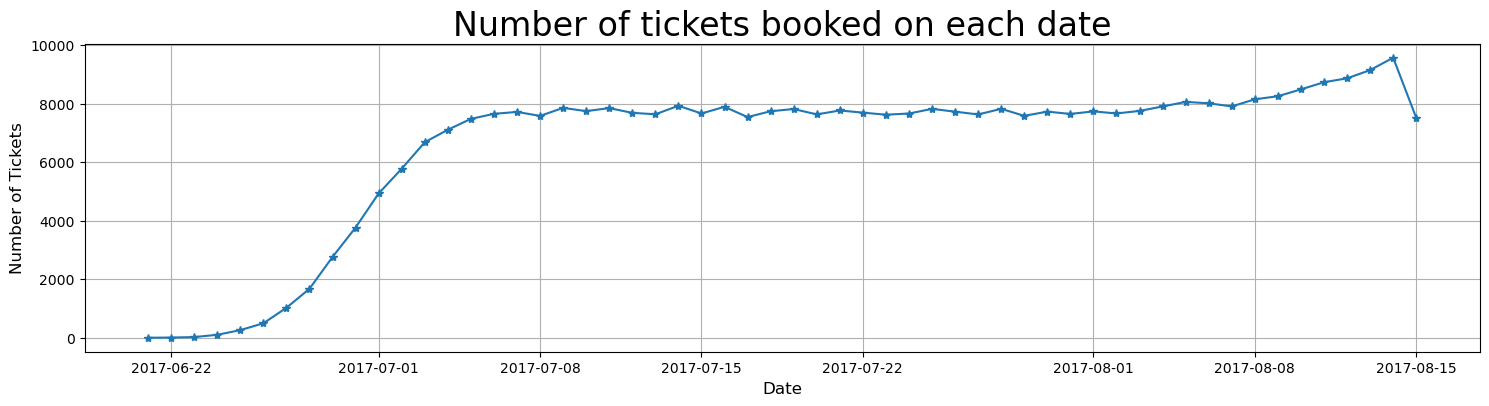

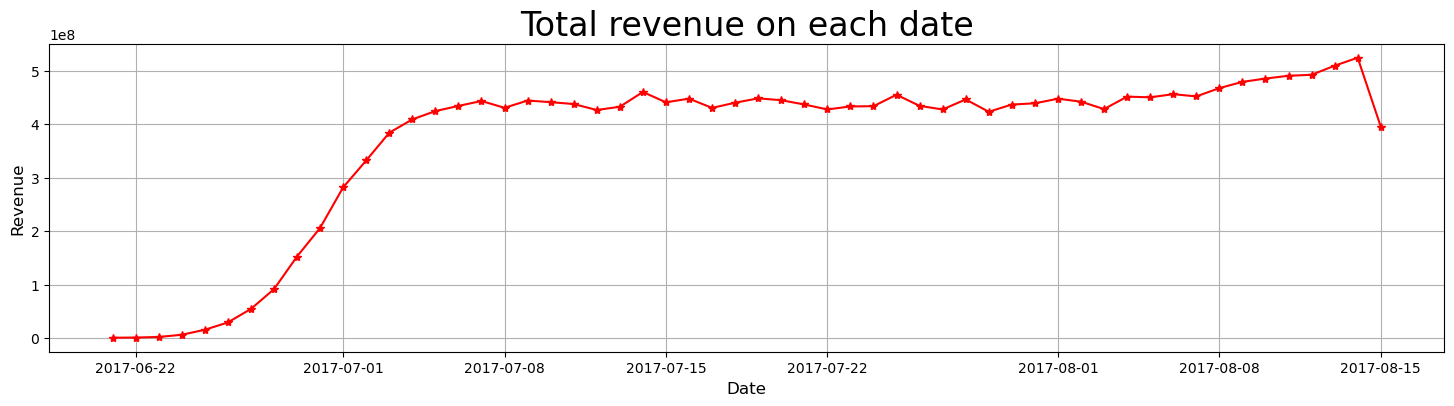

In [429]:
plt.figure(figsize=(18,4))
plt.plot(tickets_count.index,tickets_count['date'],marker='*')
plt.xlabel('Date',fontsize=12)
plt.ylabel("Number of Tickets",fontsize=12)
plt.title('Number of tickets booked on each date',fontsize=24)
plt.grid('b')
plt.show()
plt.figure(figsize=(18,4))
plt.plot(bookings_amount.index,bookings_amount['total_amount'],marker="*",color='red')
plt.title('Total revenue on each date',fontsize=24)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Revenue',fontsize=12)
plt.grid('b')
plt.show()

The number of tickets booked and the total revenue earned showed a similar trend over time. Initially, both metrics were relatively low, but towards the end of June 2017, there was a sharp increase in ticket bookings, leading to a corresponding rise in revenue. By early July 2017, the number of tickets booked reached a peak and then stabilized, maintaining a consistent level with minor fluctuations. Revenue followed the same pattern, indicating a direct relationship between ticket sales and earnings. However, around August 15, 2017, both ticket bookings and revenue experienced a sudden drop, suggesting a possible external factor such as the end of a promotional period, seasonal demand shifts, or operational changes. This trend highlights a period of rapid growth followed by stability and a sudden decline, which may require further investigation to understand the underlying causes.

**Calculate the average charges for each aircraft with differnt fare conditions**

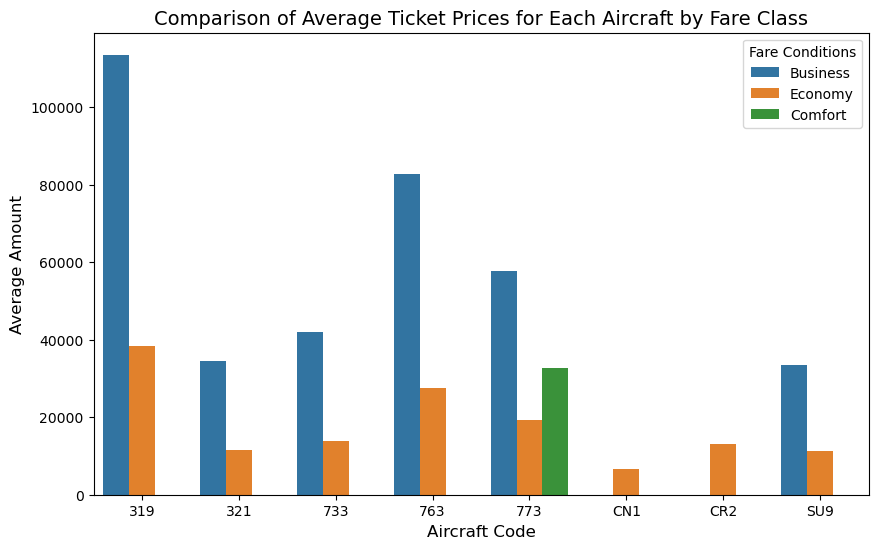

In [432]:
df_avg=pd.read_sql_query("""select tf.fare_conditions,f.aircraft_code ,avg(amount) as average_amount from ticket_flights as tf
                   join flights as f
                   on tf.flight_id=f.flight_id
                   group by aircraft_code,fare_conditions;""",conn)
plt.figure(figsize=(10, 6))
sns.barplot(x=df_avg['aircraft_code'],y=df_avg['average_amount'],hue=df_avg['fare_conditions'])
plt.title('Comparison of Average Ticket Prices for Each Aircraft by Fare Class',fontsize=14)
plt.xlabel('Aircraft Code',fontsize=12)
plt.ylabel('Average Amount',fontsize=12)
plt.legend(title='Fare Conditions')
plt.show()

<!-- Analyzing Occupancy Rate -->

The above bar graph represents the average costs associated with different fare conditions across various aircraft types. The three fare categories displayed are Business, Economy, and Comfort. Notably, the Comfort class is available exclusively on the 773 aircraft, while the CN1 and CR2 planes offer only Economy class fares. When comparing pricing within each aircraft, the Business class consistently exhibits higher charges than Economy class, indicating a uniform pricing pattern across all aircraft types. This consistent trend highlights the premium pricing strategy adopted for Business class, reflecting the enhanced services and amenities associated with this fare condition.

**Calculate total revenue per year and average revenue per ticket for each aircraft.**

In [436]:
pd.read_sql_query("""select aircraft_code,total_count,total_revenue,total_revenue/total_count as avg_revenue_per_ticket from 
                 (select f.aircraft_code, count(*) as total_count,sum(amount) as total_revenue from ticket_flights as tf
                  join flights as f
                  on tf.flight_id=f.flight_id
                  group by aircraft_code);""",conn)

,aircraft_code,total_count,total_revenue,avg_revenue_per_ticket
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


The table provides insights into the total revenue per year and the average revenue per ticket for each aircraft. The dataset includes aircraft codes, the total number of tickets sold, the total revenue generated, and the average revenue per ticket for each aircraft type. Notably, aircraft 319 has the highest average revenue per ticket, indicating a premium pricing strategy, whereas CN1 has the lowest, suggesting lower ticket prices. The aircraft SU9 generates the highest total revenue, likely due to its large passenger volume. This analysis helps in understanding revenue distribution across different aircraft and identifying high-revenue-generating planes.

#  Analyzing occupancy rates

**Calculate the average occupancy per aircraft.**

In [440]:
occupancy_rate=pd.read_sql_query("""select a.aircraft_code,avg(a.seats_count) as booked_seats,b.total_seats, avg(a.seats_count)/b.total_seats as occupancy_rate from (select f.aircraft_code,f.flight_id,count(*) as seats_count from boarding_passes as bp
                  inner join flights as f
                  on f.flight_id=bp.flight_id
                  group by aircraft_code,f.flight_id) as a
                   inner join 
                  (select aircraft_code,count(*) as total_seats from seats
                  group by aircraft_code) as b
                  on a.aircraft_code=b.aircraft_code
                  group by a.aircraft_code;""",conn)
occupancy_rate

,aircraft_code,booked_seats,total_seats,occupancy_rate
0,319,53.58318098720292,116,0.46192397402761143
1,321,88.80923076923077,170,0.5224072398190045
2,733,80.25546218487395,130,0.617349709114415
3,763,113.93729372937294,222,0.5132310528350132
4,773,264.9258064516129,402,0.659019419033863
5,CN1,6.004431314623338,12,0.5003692762186115
6,CR2,21.48284690220174,50,0.42965693804403476
7,SU9,56.81211267605634,97,0.5856918832583128


Estimate the increase in total annual turnover if all aircraft had a 10% higher occupancy rate.

In [442]:
occupancy_rate['inc_occ_rate']=occupancy_rate['occupancy_rate']+occupancy_rate['occupancy_rate']*0.1
occupancy_rate


,aircraft_code,booked_seats,total_seats,occupancy_rate,inc_occ_rate
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144


In [443]:
pd.set_option("display.float_format",str)

In [444]:
total_revenue=pd.read_sql_query(""" select aircraft_code,sum(amount) as total_revenue from ticket_flights as tf
                                inner join flights as f
                                on f.flight_id=tf.flight_id
                                group by aircraft_code;""",conn)
occupancy_rate['revenue']=total_revenue['total_revenue']
occupancy_rate['inc_revenue'] = (total_revenue['total_revenue'] / occupancy_rate['occupancy_rate']) * occupancy_rate['inc_occ_rate']

occupancy_rate

,aircraft_code,booked_seats,total_seats,occupancy_rate,inc_occ_rate,revenue,inc_revenue
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2706163100,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1638164100,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1426552100,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4371277100,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3431205500,3774326050.0
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,96373800,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,1982760500,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5114484700,5625933169.999999


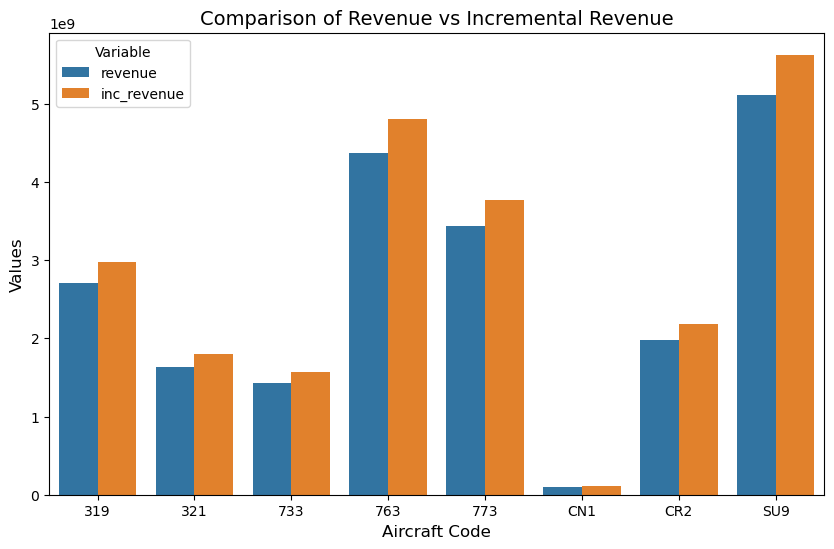

In [445]:
df_melted = occupancy_rate.melt(id_vars=['aircraft_code'], value_vars=['revenue', 'inc_revenue'])
plt.figure(figsize=(10, 6))
sns.barplot(x='aircraft_code', y='value', hue='variable', data=df_melted)
plt.xlabel('Aircraft Code', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('Comparison of Revenue vs Incremental Revenue', fontsize=14)
plt.legend(title='Variable')
plt.show()

#  Conclusion

Analyzing revenue data—such as total revenue per year, average revenue per ticket, and occupancy rate—is crucial for airlines aiming to maximize profitability. By assessing these key metrics, airlines can identify areas for improvement and adjust their pricing strategies and route planning accordingly. One significant factor influencing profitability is a higher occupancy rate, which enables airlines to optimize revenue while minimizing costs associated with vacant seats.

Additionally, pricing plays a critical role in ticket sales. Extremely high prices may deter potential passengers, while excessively low prices can reduce profitability. Therefore, airlines should establish a balanced pricing strategy that reflects the aircraft's conditions and facilities, ensuring competitive yet reasonable fares that attract passengers while maintaining profitability.

This conclusion effectively highlights the importance of revenue analysis, occupancy rates, and strategic pricing adjustments. Let me know if you need further refinements! 